# Laboratorio 9

In [1]:
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt

from vega_datasets import data

alt.themes.enable('opaque')
%matplotlib inline

En este laboratorio utilizaremos un conjunto de datos _famoso_, el GapMinder. Esta es una versión reducida que solo considera países, ingresos, salud y población. 

¿Hay alguna forma natural de agrupar a estos países?

In [2]:
gapminder = data.gapminder_health_income()
gapminder.head()

,country,income,health,population
0,Afghanistan,1925,57.63,32526562
1,Albania,10620,76.00,2896679
2,Algeria,13434,76.50,39666519
3,Andorra,46577,84.10,70473
4,Angola,7615,61.00,25021974


## Ejercicio 1

(1 pto.)

Realiza un Análisis exploratorio, como mínimo un `describe` del dataframe y una visualización adecuada, por ejemplo un _scatter matrix_ con los valores numéricos.

In [3]:
gapminder.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,187,187,Bhutan,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income,187,NaN,NaN,NaN,17232.2,19310.6,599,3585.5,10996,23834,132877
health,187,NaN,NaN,NaN,71.6733,7.74896,48.5,65.5,73.13,77.7,84.1
population,187,NaN,NaN,NaN,3.90889e+07,1.4329e+08,52993,2.24892e+06,8.54459e+06,2.76939e+07,1.37605e+09


In [4]:
gapminder.dtypes

country        object
income          int64
health        float64
population      int64
dtype: object

In [5]:
for columns in gapminder.columns:
    print(f"{columns}:\n{gapminder[columns].sort_values().unique()}\n")

country:
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana'
 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan'
 'Kenya' 'Kiribati' 'Ku

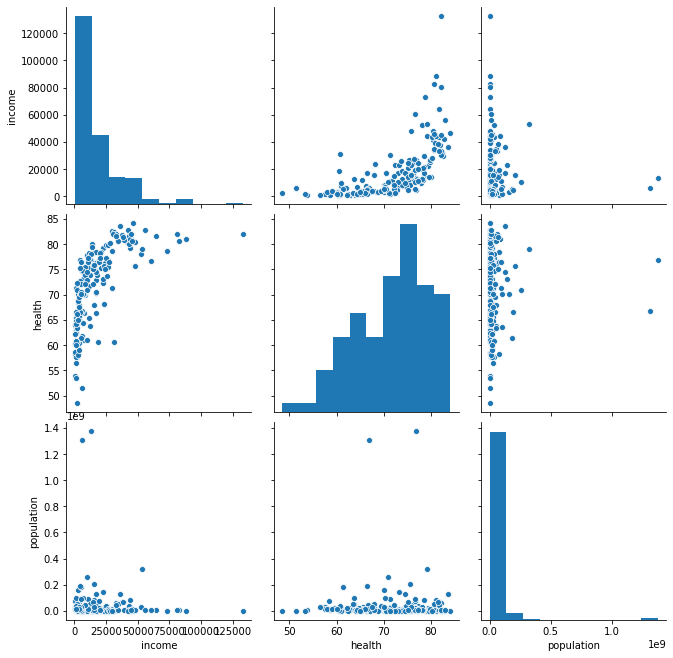

In [6]:
gapminder.dropna()
# pd.plotting.scatter_matrix(gapminder, alpha=0.5, figsize=(15,15), ax=None, s=80, grid=True, diagonal='hist', marker='D',density_kwds=None, hist_kwds=None, range_padding=0.05)
import seaborn as sns #método más directo y de mejor visualización
sns.pairplot(gapminder, height=3)


__Pregunta:__ ¿Hay alguna variable que te entregue indicios a simple vista donde se puedan separar países en grupos?

__Respuesta:__ Los países según salud e ingresos económicos sería una categorización que aportaría información relevante al caso.

## Ejercicio 2

(1 pto.)

Aplicar un escalamiento a los datos antes de aplicar nuestro algoritmo de clustering. Para ello, definir la variable `X_raw` que corresponde a un `numpy.array` con los valores del dataframe `gapminder` en las columnas _income_, _health_ y  _population_. Luego, definir la variable `X` que deben ser los datos escalados de `X_raw`.

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [14]:
import numpy as np
# from sklearn.preprocessing import LabelEncoder

#No es necesario codificar, pero si lo fuera, aquí está el código:
# labelencoder = LabelEncoder()
# gapminder['country'] = labelencoder.fit_transform(gapminder['country'])
gapminder1=gapminder.drop(columns="country")
X_raw = np.array(gapminder1)

X = preprocessing.StandardScaler().fit(X_raw)
X=X.transform(X_raw)
X

array([[-7.94812582e-01, -1.81714240e+00, -4.59203854e-02],
       [-3.43333732e-01,  5.59862729e-01, -2.53258375e-01],
       [-1.97219703e-01,  6.24560745e-01,  4.04215845e-03],
       [ 1.52369617e+00,  1.60797060e+00, -2.73035026e-01],
       [-4.99365238e-01, -1.38107777e+00, -9.84344701e-02],
       [ 1.98181268e-01,  4.56345903e-01, -2.72885662e-01],
       [ 5.80298868e-03,  5.85741936e-01,  3.02847998e-02],
       [-4.91680492e-01,  3.52829076e-01, -2.52411434e-01],
       [ 1.39279586e+00,  1.31035972e+00, -1.05802947e-01],
       [ 1.41070963e+00,  1.20684289e+00, -2.13736596e-01],
       [-1.27857897e-02,  1.58735027e-01, -2.05273828e-01],
       [ 2.90034757e-01,  8.10974068e-02, -2.70812967e-01],
       [ 1.39705363e+00,  9.73930035e-01, -2.63890818e-01],
       [-7.30634565e-01, -2.03573866e-01,  8.53054502e-01],
       [-2.20585486e-01,  5.33983522e-01, -2.71539346e-01],
       [ 9.48958998e-03, -1.64755056e-01, -2.07080201e-01],
       [ 1.24657799e+00,  1.12920527e+00

## Ejercicio 3

(1 pto.)

Definir un _estimator_ `KMeans` con `k=3` y `random_state=42`, luego ajustar con `X` y finalmente, agregar los _labels_ obtenidos a una nueva columna del dataframe `gapminder` llamada `cluster`. Finalmente, realizar el mismo gráfico del principio pero coloreado por los clusters obtenidos.


In [9]:
from sklearn.cluster import KMeans

In [10]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
# kmeans.fit(gapminder.loc[:,["income","health","population"]])

clusters = kmeans.labels_
gapminder1["clusters"] = clusters

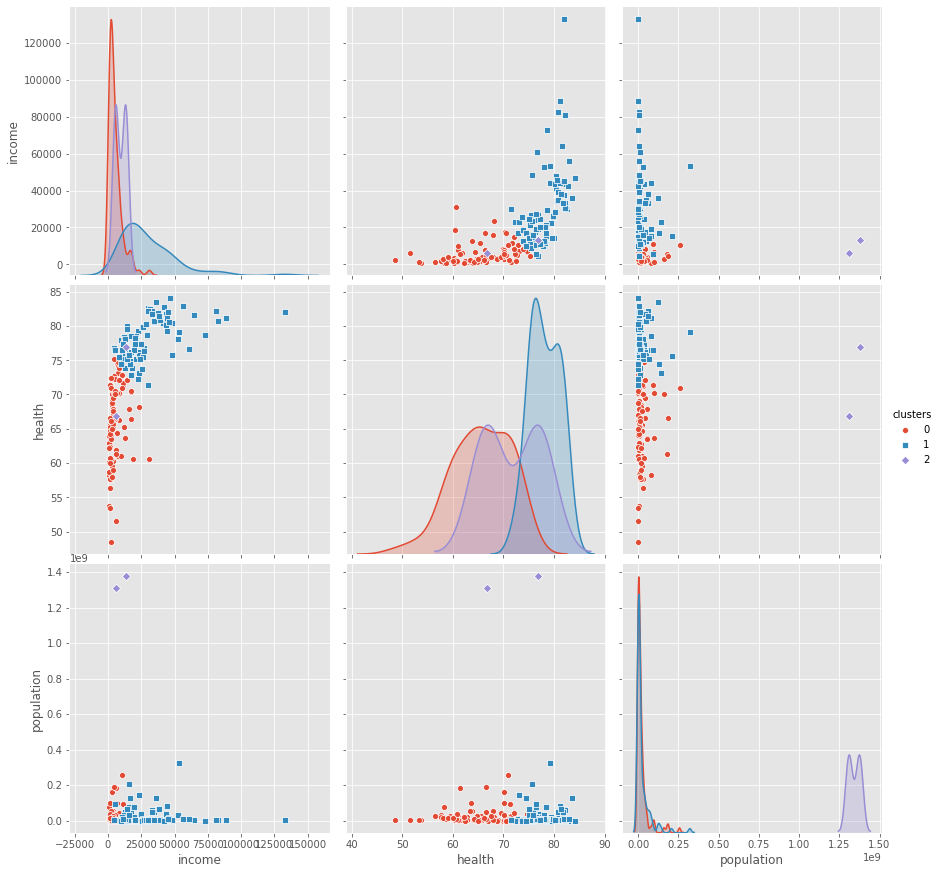

In [294]:
# pd.plotting.scatter_matrix(gapminder1, alpha=0.5, figsize=(10,10), ax=None, grid=True, diagonal='hist',
#                             marker='.', density_kwds=None, hist_kwds=None, range_padding=0.05)
sns.pairplot(gapminder1,height=4,hue='clusters', markers=["o", "s", "D"]) #se usa método más directo


## Ejercicio 4

(1 pto.)

__Regla del codo__

__¿Cómo escoger la mejor cantidad de _clusters_?__

En este ejercicio hemos utilizado que el número de clusters es igual a 3. El ajuste del modelo siempre será mejor al aumentar el número de clusters, pero ello no significa que el número de clusters sea el apropiado. De hecho, si tenemos que ajustar $n$ puntos, claramente tomar $n$ clusters generaría un ajuste perfecto, pero no permitiría representar si existen realmente agrupaciones de datos.

Cuando no se conoce el número de clusters a priori, se utiliza la [regla del codo](https://jarroba.com/seleccion-del-numero-optimo-clusters/), que indica que el número más apropiado es aquel donde "cambia la pendiente" de decrecimiento de la la suma de las distancias a los clusters para cada punto, en función del número de clusters.

A continuación se provee el código para el caso de clustering sobre los datos estandarizados, leídos directamente de un archivo preparado especialmente.En la línea que se declara `kmeans` dentro del ciclo _for_ debes definir un estimador K-Means, con `k` clusters y `random_state` 42. Recuerda aprovechar de ajustar el modelo en una sola línea.

In [20]:
elbow = pd.Series(name="inertia", dtype="float64").rename_axis(index="k")

In [24]:
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(gapminder1)
    elbow.loc[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
elbow = elbow.reset_index()

In [22]:
alt.Chart(elbow).mark_line(point=True).encode(
    x="k:O",
    y="inertia:Q"
).properties(
    height=600,
    width=800
)

alt.Chart(...)

__Pregunta:__ Considerando los datos (países) y el gráfico anterior, ¿Cuántos clusters escogerías?

__Respuesta:__ Inicialmente, se ve que hay una gran diferencia de inercia entre un k de 1 y 2, lo cual no es un buen indicador. Debido a esto, escogería el 3, dado que hay una diferencia en la pendiente, pero no es demasiado pronunciada ni demasiado estática, por lo que representa bien las diferencias de categorías. 